In [1]:
suppressWarnings(suppressMessages(source("../config_sing.R")))

In [2]:
fdiry = file.path(FD_RES, "peak", "cradle_peak_count", "results")
dir(fdiry)

[1] "dat_score_chr1.bed"  "dat_score_chr1.tsv"  "dat_score_chr10.bed"
 [4] "dat_score_chr10.tsv" "dat_score_chr11.bed" "dat_score_chr11.tsv"
 [7] "dat_score_chr12.bed" "dat_score_chr12.tsv" "dat_score_chr13.bed"
[10] "dat_score_chr13.tsv" "dat_score_chr14.bed" "dat_score_chr14.tsv"
[13] "dat_score_chr15.bed" "dat_score_chr15.tsv" "dat_score_chr16.bed"
[16] "dat_score_chr16.tsv" "dat_score_chr17.bed" "dat_score_chr17.tsv"
[19] "dat_score_chr18.bed" "dat_score_chr18.tsv" "dat_score_chr19.bed"
[22] "dat_score_chr19.tsv" "dat_score_chr2.bed"  "dat_score_chr2.tsv" 
[25] "dat_score_chr20.bed" "dat_score_chr20.tsv" "dat_score_chr21.bed"
[28] "dat_score_chr21.tsv" "dat_score_chr22.bed" "dat_score_chr22.tsv"
[31] "dat_score_chr3.bed"  "dat_score_chr3.tsv"  "dat_score_chr4.bed" 
[34] "dat_score_chr4.tsv"  "dat_score_chr5.bed"  "dat_score_chr5.tsv" 
[37] "dat_score_chr6.bed"  "dat_score_chr6.tsv"  "dat_score_chr7.bed" 
[40] "dat_score_chr7.tsv"  "dat_score_chr8.bed"  "dat_score_chr8.tsv" 
[43] "dat_score_chr9.bed"  "dat_score_chr9.tsv"  "dat_score_chrX.bed" 
[46] "dat_score_chrX.tsv"  "dat_score_chrY.bed"

In [3]:
fdiry = file.path(FD_RES, "peak", "cradle_peak_count", "results")
fglob = file.path(fdiry, "*.tsv")
Sys.glob(fglob)

[1] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr1.tsv" 
 [2] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr10.tsv"
 [3] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr11.tsv"
 [4] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr12.tsv"
 [5] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr13.tsv"
 [6] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr14.tsv"
 [7] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr15.tsv"
 [8] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr16.tsv"
 [9] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr17.tsv"
[10] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr18.tsv"
[11] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr19.tsv"
[12] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr2.tsv" 
[13] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr20.tsv"
[14] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr21.tsv"
[15] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr22.tsv"
[16] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr3.tsv" 
[17] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr4.tsv" 
[18] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr5.tsv" 
[19] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr6.tsv" 
[20] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr7.tsv" 
[21] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr8.tsv" 
[22] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chr9.tsv" 
[23] "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results/dat_score_chrX.tsv"

In [4]:
CHROMS = paste0("chr", c(1:22, "X"))
fdiry  = file.path(FD_RES, "peak", "cradle_peak_count", "results")
fnames = paste0("dat_score_", CHROMS, ".tsv")

ctypes = c(
    col_character(), col_integer(), col_integer(), col_character(), 
    col_double(), 
    col_double())

lst_dat_score = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, col_types = ctypes) %>%
        mutate(Group=str_remove(Name, pattern = ".*:.*:"))
    return(dat)
})

names(lst_dat_score) = CHROMS

In [5]:
head(lst_dat_score[[1]])

Chrom,Start,End,Name,Log2_Score_DMSO,Log2_Score_Dex,Group
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr1,778232,779232,chr1:778588-778877:DMSO,1.3727342,1.048260,DMSO
chr1,818441,819441,chr1:818351-819531:Dex,0.7172899,2.508601,Dex
chr1,826644,827644,chr1:826715-827573:DMSO,1.9053126,1.410864,DMSO
chr1,851117,852117,chr1:851268-851966:DMSO,1.8194452,1.150065,DMSO
chr1,856205,857205,chr1:856338-857072:Dex,0.6034581,1.091726,Dex
chr1,873413,874413,chr1:873788-874038:DMSO,1.0287507,1.003006,DMSO


In [10]:
lst = lapply(lst_dat_score, function(dat){return(dat[,c("Chrom", "Group")])})
dat = do.call(rbind, lst) %>% 
    as.data.frame
dat = dat %>% group_by(Chrom, Group) %>% summarise(Count = n(), .groups = "drop")
dat$Chrom = factor(dat$Chrom, levels = CHROMS)
head(dat)

Chrom,Group,Count
<fct>,<chr>,<int>
chr1,Dex,4631
chr1,DMSO,3019
chr10,Dex,2804
chr10,DMSO,1851
chr11,Dex,2712
chr11,DMSO,1875


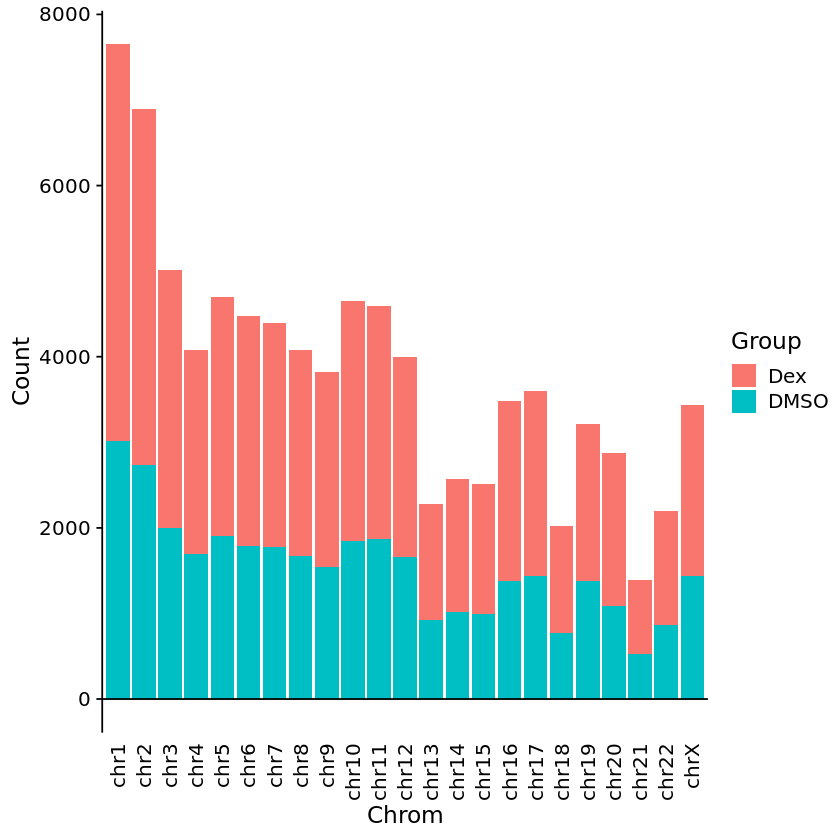

In [13]:
gpt = ggplot(dat, aes(x=Chrom, y=Count, fill=Group)) + 
    geom_bar(position="stack", stat="identity") +
    geom_hline(yintercept = 0) +
    theme_cowplot() + 
    theme(
        axis.text.x  = element_text(hjust=1, vjust=0.5 ,angle=90),
        axis.line.x  = element_blank(),
        axis.ticks.x = element_blank())
print(gpt)

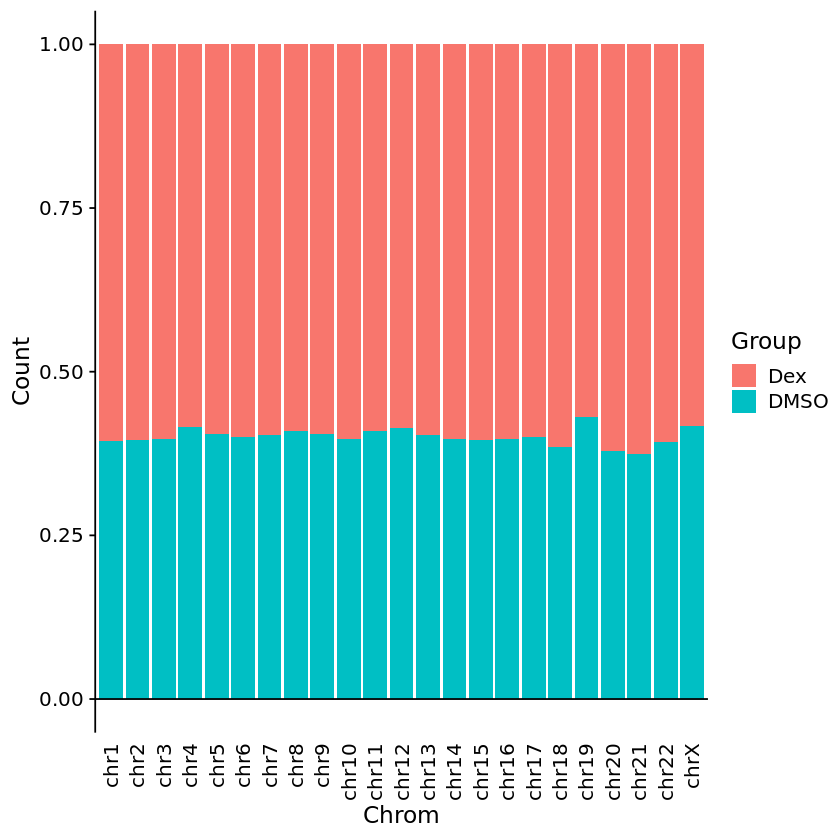

In [14]:
gpt = ggplot(dat, aes(x=Chrom, y=Count, fill=Group)) + 
    geom_bar(position="fill", stat="identity") +
    geom_hline(yintercept = 0) +
    theme_cowplot() + 
    theme(
        axis.text.x  = element_text(hjust=1, vjust=0.5 ,angle=90),
        axis.line.x  = element_blank(),
        axis.ticks.x = element_blank())
print(gpt)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


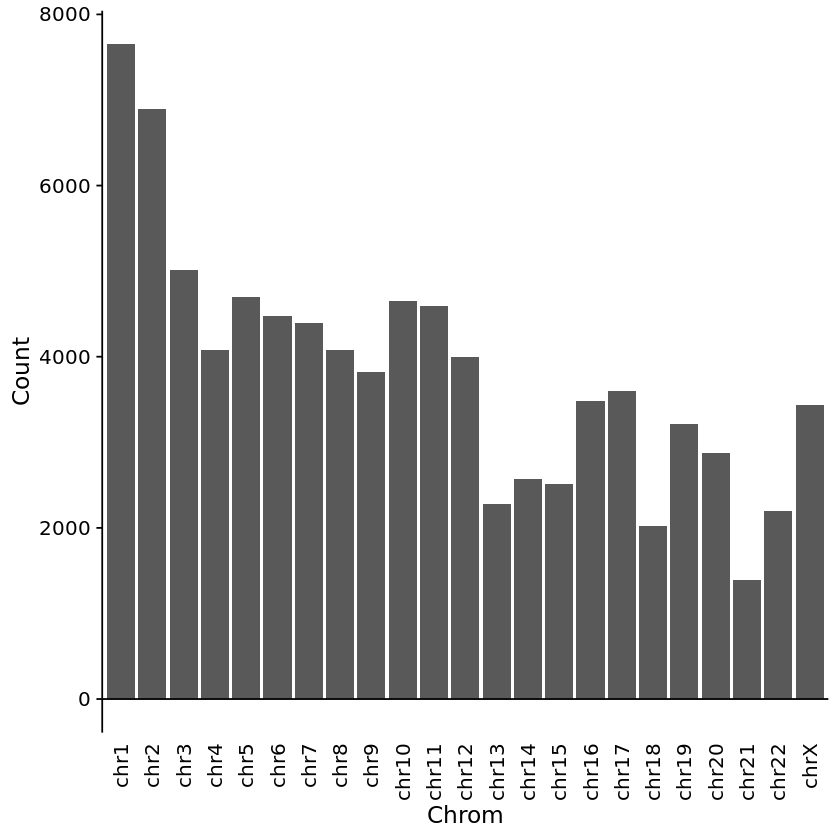

In [44]:
lst = lapply(lst_dat_score, function(dat){return(dim(dat)[1])})
dat = do.call(rbind, lst) %>% 
    as.data.frame %>%
    rownames_to_column
colnames(dat) = c("Chrom", "Count")
dat$Chrom = factor(dat$Chrom, levels = CHROMS)

gpt = ggplot(dat, aes(x=Chrom, y=Count)) + 
    geom_histogram(stat = "identity") + 
    geom_hline(yintercept = 0) +
    theme_cowplot() + 
    theme(
        axis.text.x  = element_text(hjust=1, vjust=0.5 ,angle=90),
        axis.line.x  = element_blank(),
        axis.ticks.x = element_blank())
print(gpt)

In [45]:
print(sum(dat$Count))

[1] 87909


In [34]:
lst_gpt = lapply(names(lst_dat_score), function(idx){
    dat = lst_dat_score[[idx]]
    gpt = ggplot(dat, aes(x=Log2_Score_DMSO, y= Log2_Score_Dex, color=Group)) + 
        geom_abline(slope=1, intercept=0) + 
        geom_point(size=1, alpha=0.5) + 
        coord_fixed() + 
        labs(x="Log2(DMSO)", y="Log2(Dex)", title=idx)
    return(gpt)
})

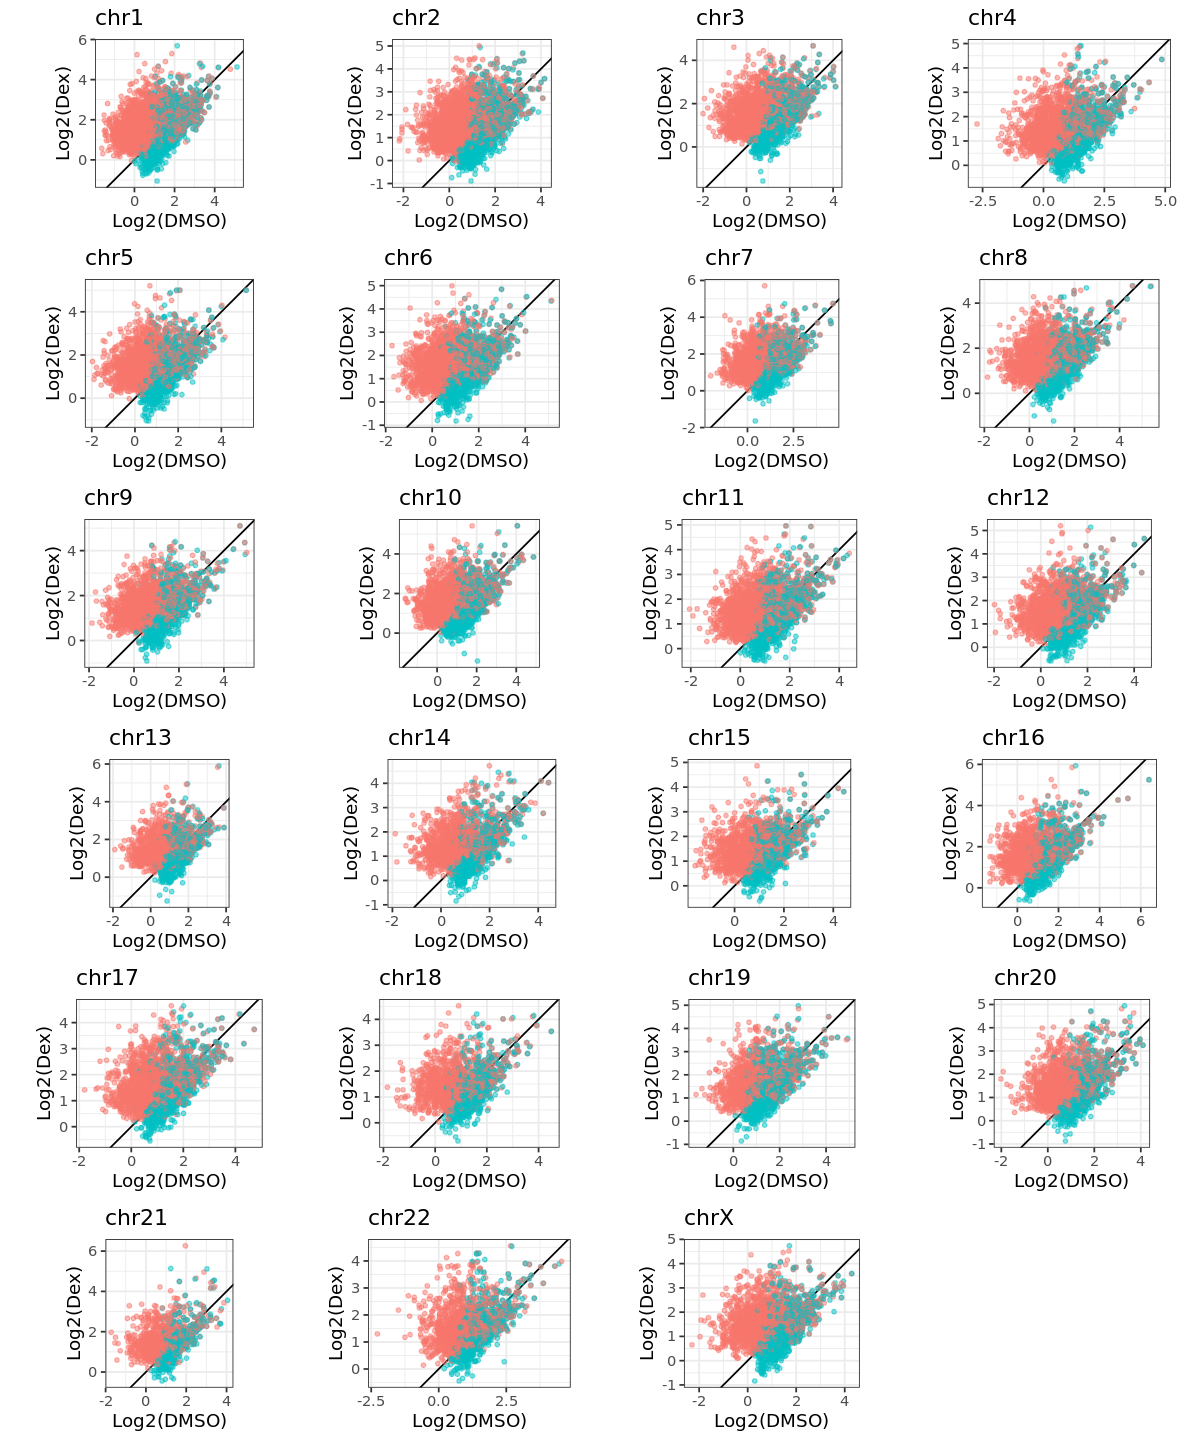

In [36]:
options(repr.plot.height=12, repr.plot.width=10)

lst = lapply(lst_gpt, function(gpt){
    gpt = gpt + 
        theme_bw() + 
        theme(legend.position = "none")
    return(gpt)
})

plot_grid(plotlist = lst, ncol = 4)

In [6]:
fdiry = "/home/mount/work/out/proj_combeffect/peak/cradle_peak_count/results"
fname = "dat_score_chr17.tsv"
fpath = file.path(fdiry, fname)
dat = read_tsv(fpath)

Rows: 3601 Columns: 6

── Column specification ─────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Name
dbl (4): Start, End, Log2_Score_DMSO, Log2_Score_Dex


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [8]:
head(dat)

Chrom,Start,End,Name,Log2_Score_DMSO,Log2_Score_Dex
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,409725,410725,chr17:409550-410900:DMSO,2.1475378,1.4906403
chr17,409925,410925,chr17:410000-410850:Dex,2.0515539,1.4042649
chr17,494432,495432,chr17:494831-495033:Dex,0.5465393,0.6516607
chr17,497086,498086,chr17:497211-497961:DMSO,1.2521746,0.6559189
chr17,502352,503352,chr17:502375-503330:DMSO,2.5877391,1.9172858
chr17,507133,508133,chr17:507505-507761:Dex,0.8631300,0.9977961


In [18]:
str_remove("chr17:409550-410900:DMSO", pattern = ".*:.*:")

[1] "DMSO"

In [20]:
tmp = dat %>% mutate(Group=str_remove(Name, pattern = ".*:.*:"))
head(tmp)

Chrom,Start,End,Name,Log2_Score_DMSO,Log2_Score_Dex,Group
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr17,409725,410725,chr17:409550-410900:DMSO,2.1475378,1.4906403,DMSO
chr17,409925,410925,chr17:410000-410850:Dex,2.0515539,1.4042649,Dex
chr17,494432,495432,chr17:494831-495033:Dex,0.5465393,0.6516607,Dex
chr17,497086,498086,chr17:497211-497961:DMSO,1.2521746,0.6559189,DMSO
chr17,502352,503352,chr17:502375-503330:DMSO,2.5877391,1.9172858,DMSO
chr17,507133,508133,chr17:507505-507761:Dex,0.8631300,0.9977961,Dex


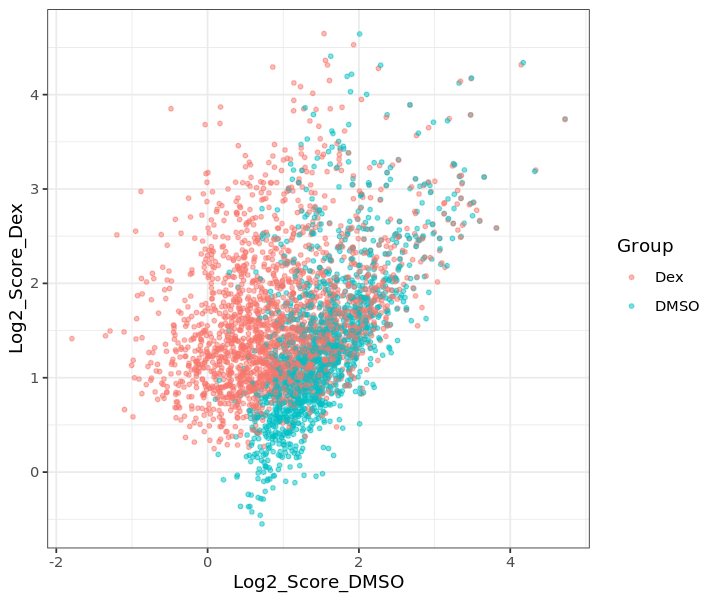

In [25]:
options(repr.plot.height=5, repr.plot.width=6)
gpt = ggplot(tmp, aes(x=Log2_Score_DMSO, y= Log2_Score_Dex, color=Group)) + 
    geom_point(size=1, alpha=0.5) + 
    theme_bw()
print(gpt)